In [74]:
from csv import reader
from math import sqrt
from math import exp
from math import pi

In [75]:
# Load a CSV file
def load_csv(filename):
    dataArr = []
    data=list()
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            data.append(row)
        for i in range(1,len(data)):
            dataset.append(data[i])
            
        #for line in file.readlines():
         #   curLine = line.strip().split(',')
          #  dataArr.append( curLine[:-1])
        
    return dataset

In [76]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
        
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('lable_name:%s => result:%d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

In [77]:
# split data and lable
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

In [78]:
# mean
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [79]:
#standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries

In [80]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

In [81]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

In [82]:
#train&make prediction
labellist_or=[]
labellist_pre=[]
filename = 'train_processed.csv'
filename2='valid_processed2.csv'
dataset = load_csv(filename)
dataset2 = load_csv(filename2)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
#process for valid,convert to float...
for j in range(0,len(dataset2[0])-1):
    str_column_to_float(dataset2, j)
#seperate valid dataset into two parts:data and original rating_lable 
for j in range(0,len(dataset2)):
    rows=dataset2[j][:-1] #every line of data without rating
    labels=dataset2[j][-1]#every line of rating
    #print(rows) 
    #print(labels) #can get output of every lines of data
#predict
    label = predict(model, rows)
#set two list of label:original,predict
    labellist_or.append(labels)
    labellist_pre.append(label)    
#the original rating data are string,convert to ’int‘ for comparing with predicted rating.
for m in range(0,len(labellist_or)):
    labellist_or[m] = int(labellist_or[m])

lable_name:4 => result:0
lable_name:1 => result:1
lable_name:2 => result:2
lable_name:5 => result:3
lable_name:3 => result:4


In [83]:
##roughly predict every line in valid
for i in range(len(dataset2)):
    row=dataset2[i]
    print(row)
    label = predict(model, row)
    print('Data=%s, lable_result: %s' % (row, label))

[-5.52513799084065, -0.6738523246884396, 0.26284666594130746, -0.07126010887959057, 0.638608281537063, 1.6223114482397283, -0.09923241296229818, '1']
Data=[-5.52513799084065, -0.6738523246884396, 0.26284666594130746, -0.07126010887959057, 0.638608281537063, 1.6223114482397283, -0.09923241296229818, '1'], lable_result: 1
[0.18084000314551646, -0.6738523246884396, -1.4360921613558766, -2.8190406810863458, -0.9869474375362917, 1.6223114482397283, -0.5564069111056045, '1']
Data=[0.18084000314551646, -0.6738523246884396, -1.4360921613558766, -2.8190406810863458, -0.9869474375362917, 1.6223114482397283, -0.5564069111056045, '1'], lable_result: 3
[0.18084000314551646, 9.40206974656268, 0.26284666594130746, 0.3478588873384722, 0.7578992657884489, 0.4505334805051293, -0.3278196620339513, '5']
Data=[0.18084000314551646, 9.40206974656268, 0.26284666594130746, 0.3478588873384722, 0.7578992657884489, 0.4505334805051293, -0.3278196620339513, '5'], lable_result: 3
[0.18084000314551646, 0.226230043959

[0.18084000314551646, -0.02379283622062543, -0.5866227477072846, 0.736755270445426, -0.9869474375362917, 0.7434779724387791, -0.4421132865697779, '4']
Data=[0.18084000314551646, -0.02379283622062543, -0.5866227477072846, 0.736755270445426, -0.9869474375362917, 0.7434779724387791, -0.4421132865697779, '4'], lable_result: 1
[0.18084000314551646, -0.7488591887424181, -0.5866227477072846, 0.10613317792824026, -1.2626739548296708, 0.4505334805051293, -0.6707005356414311, '5']
Data=[0.18084000314551646, -0.7488591887424181, -0.5866227477072846, 0.10613317792824026, -1.2626739548296708, 0.4505334805051293, -0.6707005356414311, '5'], lable_result: 1
[-5.52513799084065, -0.1988088523465754, 1.1123160795898994, 1.35977911750592, 1.2677638077161375, -0.7212444872294697, 0.01506121157352839, '5']
Data=[-5.52513799084065, -0.1988088523465754, 1.1123160795898994, 1.35977911750592, 1.2677638077161375, -0.7212444872294697, 0.01506121157352839, '5'], lable_result: 2
[0.18084000314551646, -0.37382486847

In [84]:
#switch the result name to the right lable directly
for i in range(0,len(labellist_pre)):
    if labellist_pre[i]==0:
        labellist_pre[i]=2
    elif labellist_pre[i]==1:
        labellist_pre[i]=1
    elif labellist_pre[i]==2:
        labellist_pre[i]=3
    elif labellist_pre[i]==3:
        labellist_pre[i]=5
    elif labellist_pre[i]==4:
        labellist_pre[i]=4
#labellist_pre

In [85]:
#roughly calculate error
error=0
labellist_or
for n in range(0,len(labellist_or)):
    if labellist_pre[n]!=labellist_or[n]:
        error+=1
print(error)
print(1 - (error / len(labellist_or)))

608
0.49291075896580483


In [86]:
#calculate 
import sklearn as sk
true=len(labellist_or)-error

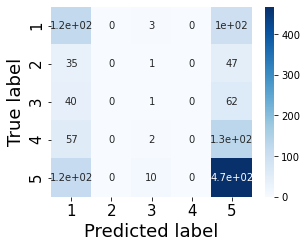

In [87]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score

# create confusion matrix
y_true = labellist_or
y_pred = labellist_pre
cm = confusion_matrix(y_true, y_pred)
conf_matrix = pd.DataFrame(cm, index=['1','2','3','4','5'], columns=['1','2','3','4','5'])

# plot size setting
fig, ax = plt.subplots(figsize = (4.5,3.5))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 10}, cmap="Blues")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('confusion.pdf', bbox_inches='tight')
plt.show()

In [88]:
print('------Weighted------')
print('Weighted precision', precision_score(y_true, y_pred, average='weighted'))
print('Weighted recall', recall_score(y_true, y_pred, average='weighted'))
print('Weighted f1-score', f1_score(y_true, y_pred, average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(y_true, y_pred, average='macro'))
print('Macro recall', recall_score(y_true, y_pred, average='macro'))
print('Macro f1-score', f1_score(y_true, y_pred, average='macro'))
print('------Micro------')
print('Micro precision', precision_score(y_true, y_pred, average='micro'))
print('Micro recall', recall_score(y_true, y_pred, average='micro'))
print('Micro f1-score', f1_score(y_true, y_pred, average='micro'))

------Weighted------
Weighted precision 0.3534034753313716
Weighted recall 0.49291075896580483
Weighted f1-score 0.4088303537006492
------Macro------
Macro precision 0.19294597023603427
Macro recall 0.26721727371247495
Macro f1-score 0.21821904687019736
------Micro------
Micro precision 0.49291075896580483
Micro recall 0.49291075896580483
Micro f1-score 0.49291075896580483


/Users/viviennesmith/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/viviennesmith/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [308]:
#lablelist_pre

In [309]:
#dataset

[[1.0, 22.0, 4.0, 3.789227247, 2012.0, 2.0, 28.0, 3],
 [1.0, 17.0, 2.0, 3.545454502, 2009.0, 5.0, 17.0, 4],
 [1.0, 3.0, 5.0, 4.333333492, 2017.0, 9.0, 29.0, 3],
 [1.0, 35.0, 4.0, 4.329670429, 2017.0, 3.0, 5.0, 3],
 [1.0, 4.0, 2.0, 3.287747145, 2015.0, 10.0, 22.0, 3],
 [1.0, 13.0, 2.0, 0.0, 2014.0, 7.0, 3.0, 0],
 [1.0, 1.0, 4.0, 3.287747145, 2016.0, 6.0, 6.0, 2],
 [1.0, 32.0, 5.0, 4.188405991, 2009.0, 4.0, 21.0, 3],
 [1.0, 21.0, 5.0, 2.933333397, 2016.0, 10.0, 18.0, 4],
 [1.0, 3.0, 1.0, 3.287747145, 2011.0, 4.0, 16.0, 1],
 [1.0, 17.0, 3.0, 3.799999952, 2017.0, 2.0, 22.0, 1],
 [1.0, 7.0, 3.0, 4.099999905, 2015.0, 5.0, 7.0, 2],
 [1.0, 57.0, 4.0, 4.329670429, 2014.0, 9.0, 23.0, 1],
 [-1.0, 19.0, 4.0, 3.956521749, 2014.0, 10.0, 8.0, 3],
 [1.0, 44.0, 2.0, 5.0, 2015.0, 1.0, 13.0, 1],
 [1.0, 14.0, 5.0, 3.444444418, 2010.0, 6.0, 30.0, 3],
 [1.0, 26.0, 5.0, 3.962025404, 2015.0, 2.0, 14.0, 3],
 [1.0, 1.0, 2.0, 4.008546829, 2017.0, 6.0, 22.0, 0],
 [1.0, 24.0, 4.0, 3.725806475, 2009.0, 7.0, 14.0, 2

In [116]:
#predict test data
#train&make prediction
labellist_predict=[]
filename = 'train_processed.csv'
filename3='test_processed2.csv'
filename4='testing.csv'
dataset = load_csv(filename)
dataset3 = load_csv(filename3)
dataset4 = load_csv(filename4)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# fit model
model = summarize_by_class(dataset)
#process for valid,convert to float...
for j in range(len(dataset3[0])):
    str_column_to_float(dataset3, j)
#get data of test data 
for m in range(0,len(dataset3)):
    lines=dataset3[m] #every line of data without rating
#predict
    label_test = predict(model,lines)
#set  list of predicted label of test
    labellist_predict.append(label_test)    
 #   print('Data=%s, Predicted: %s' % (lines, label_test))
#print(labellist_predict)
#switch the result name to the right lable directly
for i in range(0,len(labellist_predict)):
    if labellist_predict[i]==0:
        labellist_predict[i]=2
    elif labellist_predict[i]==1:
        labellist_predict[i]=1
    elif labellist_predict[i]==2:
        labellist_predict[i]=3
    elif labellist_predict[i]==3:
        labellist_predict[i]=5
    elif labellist_predict[i]==4:
        labellist_predict[i]=4
for m in range(0,len(dataset4)):
    dataset4[m][7]=labellist_predict[m]
dataset4[1]

lable_name:4 => result:0
lable_name:1 => result:1
lable_name:2 => result:2
lable_name:5 => result:3
lable_name:3 => result:4


['134044',
 'Prednisone',
 'Cluster Headaches',
 '"Have had clusters for 45 years, remember the first one. Ergotamine inhaler worked almost instantaneously but gave me a nasty depression. I take prednisone 2(10mg) at breakfast , 1(10mg) at dinner. Tried taking less and headaches come back with a vengeance! They mess with my digestive tract some , and sharp increase in appetite, and an increase in sexual desire. It is not supposed to do that. I will stay on this medication till the cluster cycle ends"',
 '29-Aug-17',
 '0',
 'Moderate Side Effects',
 5]

In [118]:
name=['recordId','drugName','condition','reviewComment','date','usefulCount','sideEffects',
      'rating']
test_predicted=pd.DataFrame(columns=name,data=dataset4)
print(test_predicted)
test_predicted.to_csv('test_predicted2.csv',encoding='gbk')

     recordId                 drugName                          condition  \
0      219597  Microgestin Fe 1.5 / 30                      Birth Control   
1      134044               Prednisone                  Cluster Headaches   
2       68176                   Plan B            Emergency Contraception   
3      200538              Varenicline                  Smoking Cessation   
4       46409                Modafinil                         Narcolepsy   
...       ...                      ...                                ...   
1793   132278                   Ativan                           Insomnia   
1794   126842             Erythromycin  Upper Respiratory Tract Infection   
1795    68153                   Plan B            Emergency Contraception   
1796   126865                 Dilaudid                               Pain   
1797    40841               Leuprolide                      Endometriosis   

                                          reviewComment       date  \
0    